In [1]:
import pandas as pd
import os
from plotnine import * # para usar ggplot
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import numpy as np

<font color = 'deepskyblue'>
<font size = 5>
    
Lectura de los datos

In [2]:
# Obtenemos la ruta del notebook
os.getcwd()

'C:\\Users\\matma\\Documents\\Developer\\Projects\\Exoplanets\\Notebook'

In [3]:
# Ruta del dataframe
ruta_df = ('C:\\Users\\matma\\Documents\\Developer\\Projects\\Exoplanets\\Data\\Raw\\exoplanets_catalog.csv')

# Cargamos los datos
df = pd.read_csv(ruta_df)

# Mostramos las primeras filas del dataset
print(df.head())

        name planet_status   mass  mass_error_min  mass_error_max  mass_sini  \
0  109 Psc b     Confirmed  5.743           0.289           1.011      6.383   
1  109 Tau b     Candidate    NaN             NaN             NaN     16.000   
2  110 Vir b     Candidate  1.600           0.100           0.100        NaN   
3  112 Psc b     Confirmed    NaN           0.005           0.004      0.033   
4  112 Psc c     Confirmed  9.866           1.781           3.190        NaN   

   mass_sini_error_min  mass_sini_error_max  radius  radius_error_min  ...  \
0                0.078                0.078   1.152               NaN  ...   
1                  NaN                  NaN     NaN               NaN  ...   
2                  NaN                  NaN     NaN               NaN  ...   
3                0.005                0.004     NaN               NaN  ...   
4                  NaN                  NaN     NaN               NaN  ...   

   star_sp_type  star_age  star_age_error_min  sta

In [4]:
# Muestra la dimensiones del dataset
print(df.shape)

(9981, 98)


In [5]:
# Muestra el nombre de todas las columnas del dataset
print(df.columns)

Index(['name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'impa

In [6]:
# Muestra información general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9981 entries, 0 to 9980
Data columns (total 98 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        9981 non-null   object 
 1   planet_status               9981 non-null   object 
 2   mass                        3809 non-null   float64
 3   mass_error_min              4217 non-null   float64
 4   mass_error_max              4226 non-null   float64
 5   mass_sini                   1666 non-null   float64
 6   mass_sini_error_min         1338 non-null   float64
 7   mass_sini_error_max         1338 non-null   float64
 8   radius                      6730 non-null   float64
 9   radius_error_min            6081 non-null   float64
 10  radius_error_max            6081 non-null   float64
 11  orbital_period              8342 non-null   float64
 12  orbital_period_error_min    7340 non-null   float64
 13  orbital_period_error_max    7340 

In [7]:
# Muestra estadísticas generales de las columnas numéricas
print(df.describe())

               mass  mass_error_min  mass_error_max    mass_sini  \
count  3.809000e+03     4217.000000        4226.000  1666.000000   
mean   1.438350e+01        5.916180             inf     8.159279   
std    2.046353e+01       30.933061             NaN    26.290957   
min    3.000000e-12        0.000000         -17.800     0.000190   
25%    1.500000e-01        0.013252           0.012     0.076000   
50%    2.500000e+00        0.130000           0.130     1.376000   
75%    2.400000e+01        2.000000           2.100     6.767500   
max    1.671000e+02      596.860537             inf   690.000000   

       mass_sini_error_min  mass_sini_error_max       radius  \
count          1338.000000          1338.000000  6730.000000   
mean              1.728188             4.494427     2.826954   
std              20.761905            76.162403    51.508224   
min               0.000000             0.000000     0.000000   
25%               0.007925             0.008000     0.136000   
50%

C:\Users\matma\anaconda3\envs\exoplanets_project\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract


In [8]:
# Muestra los valores nulos por columnas
print('Valores nulos por columna:')
print(df.isnull().sum())

Valores nulos por columna:
name                       0
planet_status              0
mass                    6172
mass_error_min          5764
mass_error_max          5755
                        ... 
star_teff_error_min     2416
star_teff_error_max     2416
star_detected_disc      9805
star_magnetic_field     9972
star_alternate_names    3500
Length: 98, dtype: int64


In [9]:
# Obtenemos el procentaje de valores nulos por columna
null_percent = df.isnull().mean() * 100

print(null_percent)

name                     0.000000
planet_status            0.000000
mass                    61.837491
mass_error_min          57.749724
mass_error_max          57.659553
                          ...    
star_teff_error_min     24.205991
star_teff_error_max     24.205991
star_detected_disc      98.236650
star_magnetic_field     99.909829
star_alternate_names    35.066627
Length: 98, dtype: float64


In [10]:
print("Tipo de dato actual de 'discovered':")
print(df["discovered"].dtype)

Tipo de dato actual de 'discovered':
int64


In [11]:
# Transformamos los datos de la columna 'discovered' a fecha
df['discovered'] = pd.to_datetime(
    df['discovered'],
    format='%Y',      # solo trabaja con el año
    errors='coerce'   # convierte los valores no conformes en NaT
)

In [12]:
print("Tipo de dato actual de 'discovered':")
print(df["discovered"].dtype)

Tipo de dato actual de 'discovered':
datetime64[ns]


<font color = 'DodgerBlue'>
<font size = 5>

---
    
**Gráficas preliminares usando el dataset sin procesar**

C:\Users\matma\AppData\Local\Temp\ipykernel_17972\4035670529.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


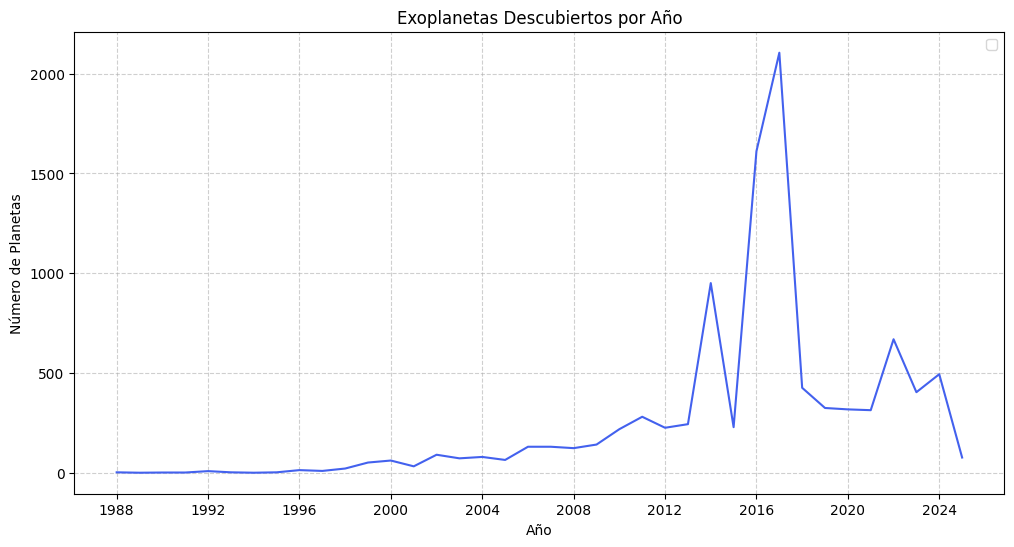

In [13]:
descubiertos_by_year = df.groupby('discovered').size()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x = descubiertos_by_year.index,
    y = descubiertos_by_year.values,
    color = "#4361EE",
)
plt.title("Exoplanetas Descubiertos por Año")
plt.xlabel("Año")
plt.ylabel("Número de Planetas")
plt.grid(linestyle="--", alpha=0.6)
plt.legend()
plt.show()

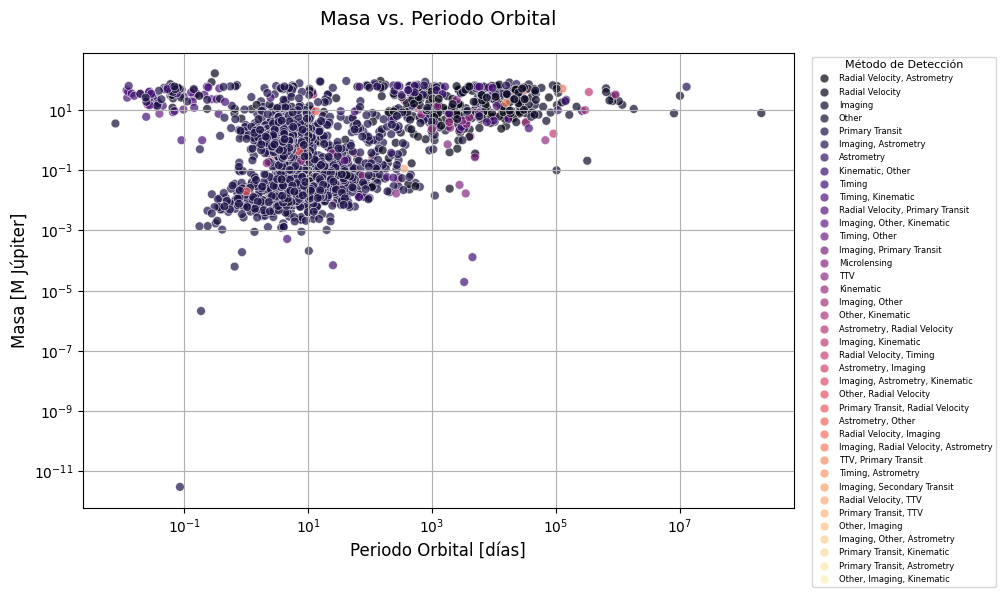

In [44]:
# Tamaño del lienzo
plt.figure(figsize=(12, 6))

# Definimos un gráfico de dispersión
scatter = sns.scatterplot(
    data = df,
    x = "orbital_period",
    y = "mass",
    hue = "detection_type",
    palette = "magma",
    alpha = 0.7,
    s = 40  # para reducir tamaño de puntos
)

# Escala logarítmica en los ejes
plt.xscale('log')
plt.yscale('log')

# Títulos y labels
plt.title("Masa vs. Periodo Orbital", fontsize = 14, pad = 20)
plt.xlabel("Periodo Orbital [días]", fontsize = 12)
plt.ylabel("Masa [M Júpiter]", fontsize = 12)

# Configurar leyenda
legend = plt.legend(
    title = "Método de Detección",
    title_fontsize = "8",
    fontsize = "6",
    loc = "upper left",
    bbox_to_anchor = (1.02, 1),  # mover 102% a la derecha del eje X
    ncol = 1,  # ajusta las columnas para ahorrar espacio vertical, con 2 se reduce el espacio
    frameon = True  # con fondo
)

# Ajustar márgenes
plt.tight_layout(rect = [0, 0, 0.85, 1])
plt.grid()
plt.show()

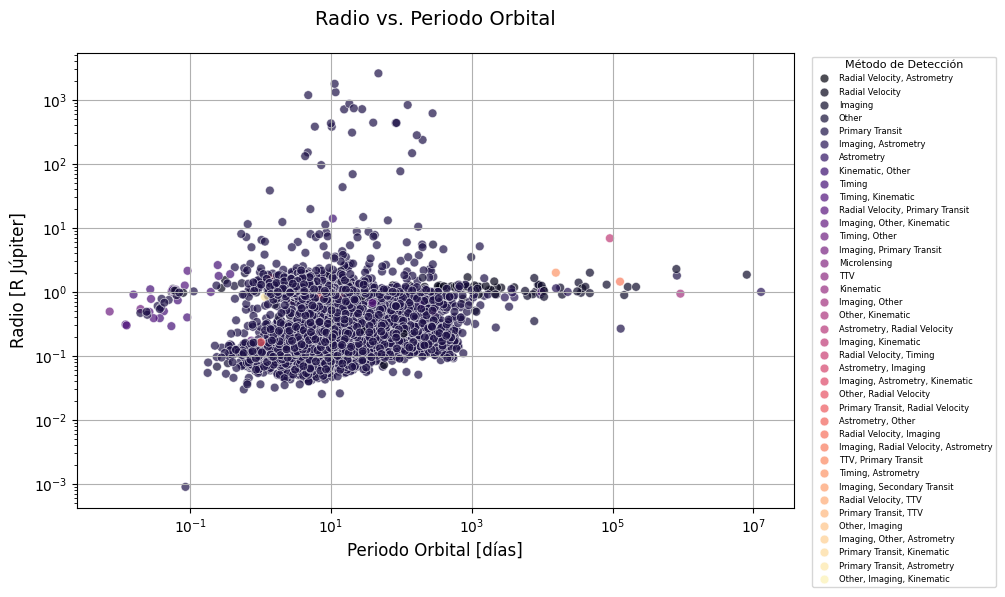

In [45]:
# Tamaño del lienzo
plt.figure(figsize=(12, 6))

# Definimos un gráfico de dispersión
scatter = sns.scatterplot(
    data = df,
    x = "orbital_period",
    y = "radius",
    hue = "detection_type",
    palette = "magma",
    alpha = 0.7,
    s = 40  # para reducir tamaño de puntos
)

# Escala logarítmica en los ejes
plt.xscale('log')
plt.yscale('log')

# Títulos y labels
plt.title("Radio vs. Periodo Orbital", fontsize = 14, pad = 20)
plt.xlabel("Periodo Orbital [días]", fontsize = 12)
plt.ylabel("Radio [R Júpiter]", fontsize = 12)

# Configurar leyenda
legend = plt.legend(
    title = "Método de Detección",
    title_fontsize = "8",
    fontsize = "6",
    loc = "upper left",
    bbox_to_anchor = (1.02, 1),  # mover 102% a la derecha del eje X
    ncol = 1,  # ajusta las columnas para ahorrar espacio vertical, con 2 se reduce el espacio
    frameon = True  # con fondo
)

# Ajustar márgenes
plt.tight_layout(rect = [0, 0, 0.85, 1])
plt.grid()
plt.show()

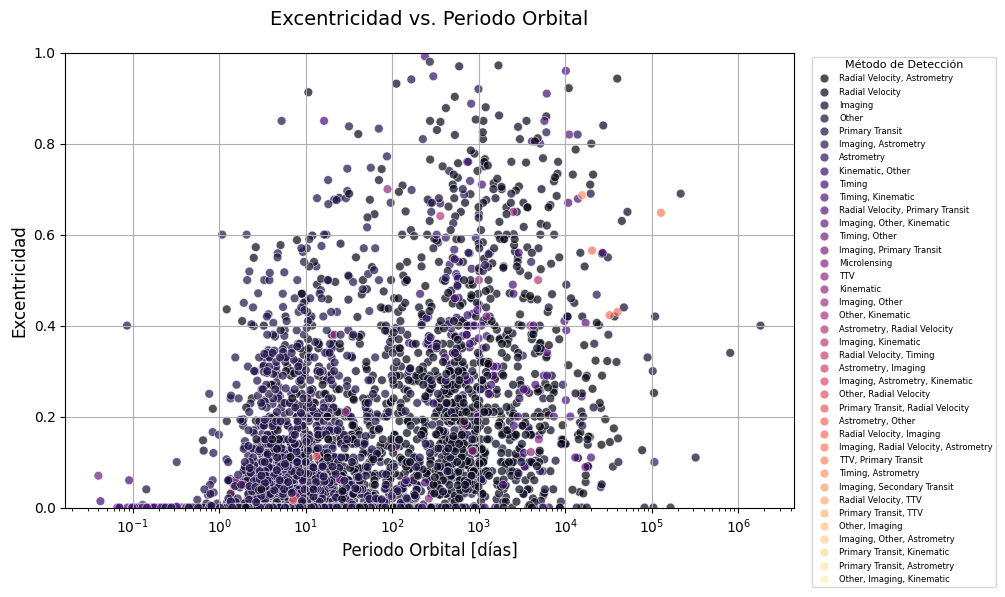

In [16]:
# Tamaño del lienzo
plt.figure(figsize=(12, 6))

# Definimos un gráfico de dispersión
scatter = sns.scatterplot(
    data = df,
    x = "orbital_period",
    y = "eccentricity",
    hue = "detection_type",
    palette = "magma",
    alpha = 0.7,
    s = 40  # para reducir tamaño de puntos
)

# Escala logarítmica en los ejes
plt.xscale('log')

# Ajustar los limites del eje Y
plt.ylim(0, 1)

# Títulos y labels
plt.title("Excentricidad vs. Periodo Orbital", fontsize = 14, pad = 20)
plt.xlabel("Periodo Orbital [días]", fontsize = 12)
plt.ylabel("Excentricidad", fontsize = 12)

# Configurar leyenda
legend = plt.legend(
    title = "Método de Detección",
    title_fontsize = "8",
    fontsize = "6",
    loc = "upper left",
    bbox_to_anchor = (1.02, 1),  # mover 102% a la derecha del eje X
    ncol = 1,  # ajusta las columnas para ahorrar espacio vertical, con 2 se reduce el espacio
    frameon = True  # con fondo
)

# Ajustar márgenes
plt.tight_layout(rect = [0, 0, 0.85, 1])
plt.grid()
plt.show()

<font color = 'deepskyblue'>
<font size = 5>

---
    
Procesamiento de los datos

In [17]:
# Obtenemos los valores únicos que hay en la columna de 'planet_status' 
df['planet_status'].unique()

array(['Confirmed', 'Candidate', 'Retracted', 'Controversial',
       'Unconfirmed'], dtype=object)

In [18]:
# Obtenemos un subconjunto del dataset con las columnas que son de nuestro interés
conservar_columnas = [
    # Identificación
    'name', 'planet_status',
    
    # Propiedades del planeta
    'mass', 'radius', 'orbital_period', 'semi_major_axis', 'eccentricity',
    
    # Estrella anfitriona
    'star_name', 'star_metallicity', 'star_mass', 'star_radius', 'star_teff', 'star_sp_type',
    
    # Temperatura
    'temp_calculated', 'temp_measured',
    
    # Métodos
    'detection_type', 'discovered'
]

df_clean = df[conservar_columnas]

df_clean

,name,planet_status,mass,radius,orbital_period,semi_major_axis,eccentricity,star_name,star_metallicity,star_mass,star_radius,star_teff,star_sp_type,temp_calculated,temp_measured,detection_type,discovered
0,109 Psc b,Confirmed,5.743,1.152,1075.400000,2.05100,0.104,109 Psc,0.100,1.13,1.7900,5600.00,G5 IV,NaN,NaN,"Radial Velocity, Astrometry",2000-01-01
1,109 Tau b,Candidate,NaN,NaN,26.000000,0.23200,NaN,109 Tau,0.096,2.47,9.8000,5012.07,G8III,NaN,NaN,Radial Velocity,2005-01-01
2,110 Vir b,Candidate,1.600,NaN,507.000000,1.37000,0.300,110 Vir,-0.220,1.30,13.4000,4650.00,K0IIIb,NaN,NaN,Radial Velocity,2004-01-01
3,112 Psc b,Confirmed,NaN,NaN,4.400000,0.05400,0.376,112 Psc,0.310,1.10,1.8010,5986.00,G0IV,NaN,NaN,Radial Velocity,2022-01-01
4,112 Psc c,Confirmed,9.866,NaN,36336.700000,22.21000,0.174,112 Psc,0.310,1.10,1.8010,5986.00,G0IV,NaN,NaN,"Radial Velocity, Astrometry",2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,ZTF J1637+49 b,Confirmed,23.000,0.680,0.043000,NaN,NaN,ZTF J1637+49,NaN,0.90,0.0090,11200.00,DA,NaN,NaN,Primary Transit,2021-01-01
9977,ZTF J1828+2308 b,Confirmed,19.500,1.020,0.112007,0.00388,NaN,ZTF J1828+2308,NaN,0.61,0.0131,15900.00,DA,NaN,NaN,Primary Transit,2025-01-01
9978,ZTF J1935+12,Candidate,56.900,2.630,0.245830,0.00620,NaN,ZTF J1935+12,NaN,NaN,0.1810,28360.00,sdB,2500.0,NaN,Timing,2022-01-01
9979,ZTF J2213+44 b,Candidate,NaN,1.780,0.253609,0.00633,NaN,ZTF J2213+44,NaN,0.47,0.2040,28320.00,sdB,3300.0,NaN,Timing,2022-01-01


In [19]:
# Trabajando con los planetas 'confirmados'

In [20]:
df_conf = df_clean[df_clean['planet_status'] == 'Confirmed']

print(df_conf)

                   name planet_status    mass  radius  orbital_period  \
0             109 Psc b     Confirmed   5.743   1.152     1075.400000   
3             112 Psc b     Confirmed     NaN     NaN        4.400000   
4             112 Psc c     Confirmed   9.866     NaN    36336.700000   
5             11 Com Ab     Confirmed     NaN     NaN      326.030000   
6              11 UMi b     Confirmed     NaN     NaN      516.220000   
...                 ...           ...     ...     ...             ...   
9974  ZTF J1406+1222 Ab     Confirmed  50.000   0.292        0.054057   
9975     ZTF J1622+47 b     Confirmed  61.000   0.980        0.069789   
9976     ZTF J1637+49 b     Confirmed  23.000   0.680        0.043000   
9977   ZTF J1828+2308 b     Confirmed  19.500   1.020        0.112007   
9980     ZTF J2252-05 b     Confirmed  26.000   0.490        0.024000   

      semi_major_axis  eccentricity         star_name  star_metallicity  \
0             2.05100         0.104           10

In [21]:
# Obtenemos el procentaje de valores nulos por columna
print(df_conf.isnull().mean() * 100)

name                 0.000000
planet_status        0.000000
mass                54.953020
radius              33.046980
orbital_period      17.422819
semi_major_axis     30.939597
eccentricity        57.543624
star_name           10.550336
star_metallicity    29.476510
star_mass           16.657718
star_radius         22.523490
star_teff           20.201342
star_sp_type        50.335570
temp_calculated     66.805369
temp_measured       98.281879
detection_type       0.000000
discovered           0.000000
dtype: float64


C:\Users\matma\anaconda3\envs\exoplanets_project\lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_bin : Removed 4094 rows containing non-finite values.


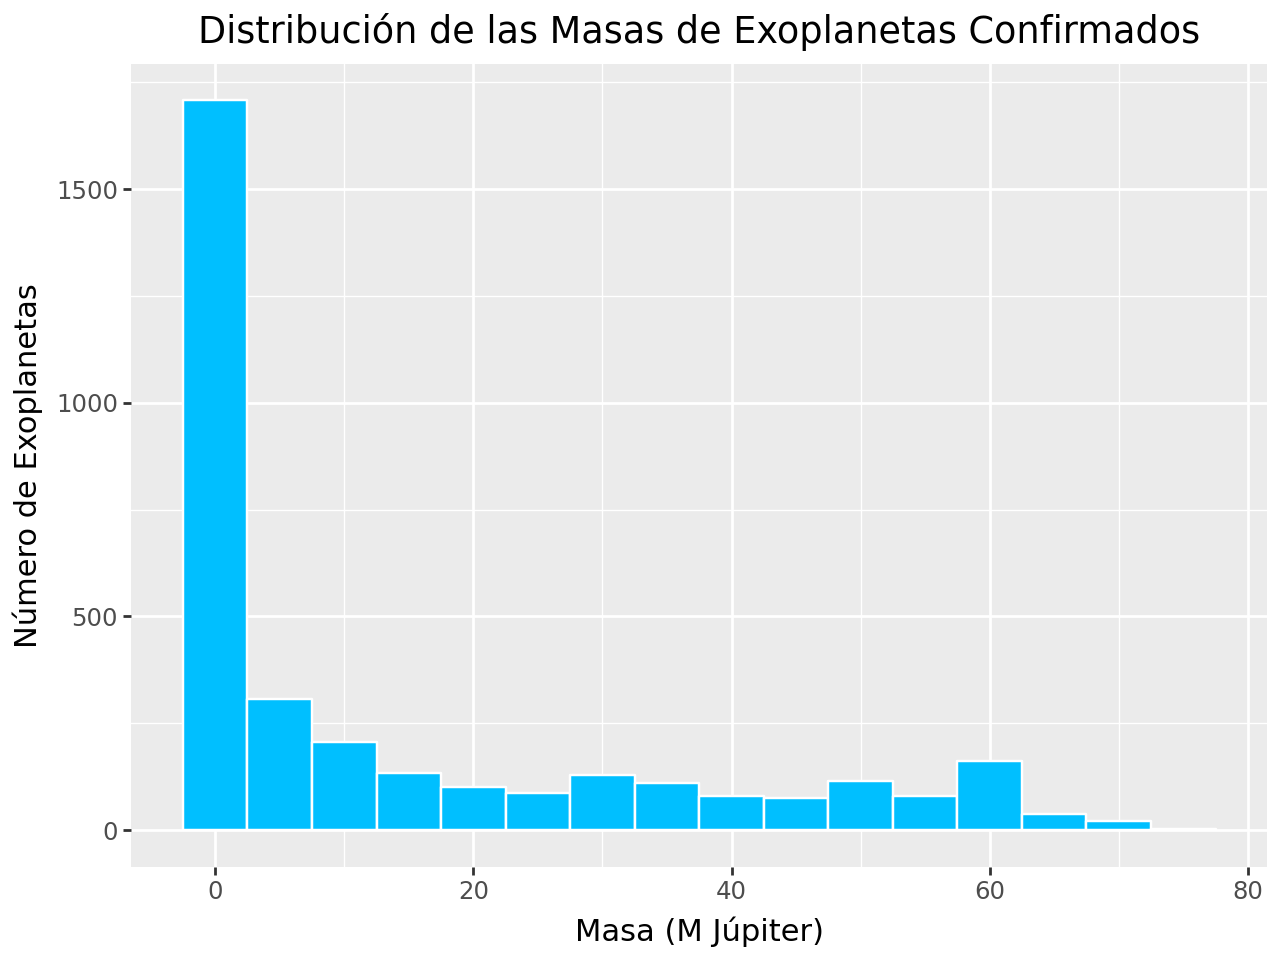

In [41]:
# Creamos un histograma de las masas de los planetas confirmados para ver su distribución 
(
    ggplot(data = df_conf) +
    geom_histogram(mapping = aes(x = "mass"), fill = "deepskyblue", color = "white", binwidth = 5) +
    labs(
        x = "Masa (M Júpiter)",
        y = "Número de Exoplanetas"
    ) +
    ggtitle("Distribución de las Masas de Exoplanetas Confirmados")
)

C:\Users\matma\anaconda3\envs\exoplanets_project\lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_bin : Removed 2462 rows containing non-finite values.


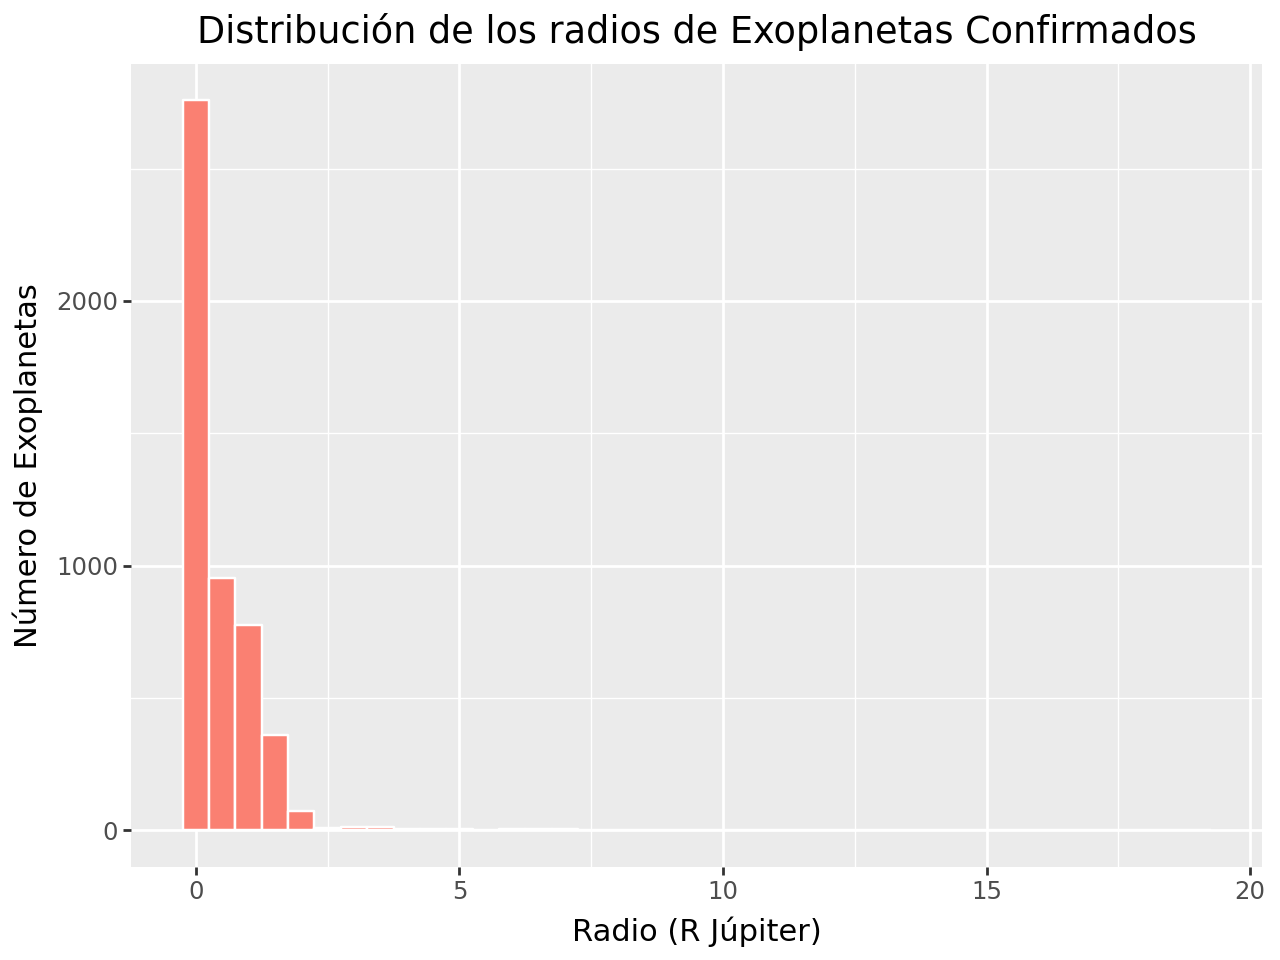

In [42]:
# Creamos un histograma de los radios de los planetas confirmados para ver su distribución 
(
    ggplot(data = df_conf) +
    geom_histogram(mapping = aes(x = "radius"), fill = "salmon", color = "white", binwidth = 0.5) +
    labs(
        x = "Radio (R Júpiter)" ,
        y = "Número de Exoplanetas"
    ) +
    ggtitle("Distribución de los radios de Exoplanetas Confirmados")
)

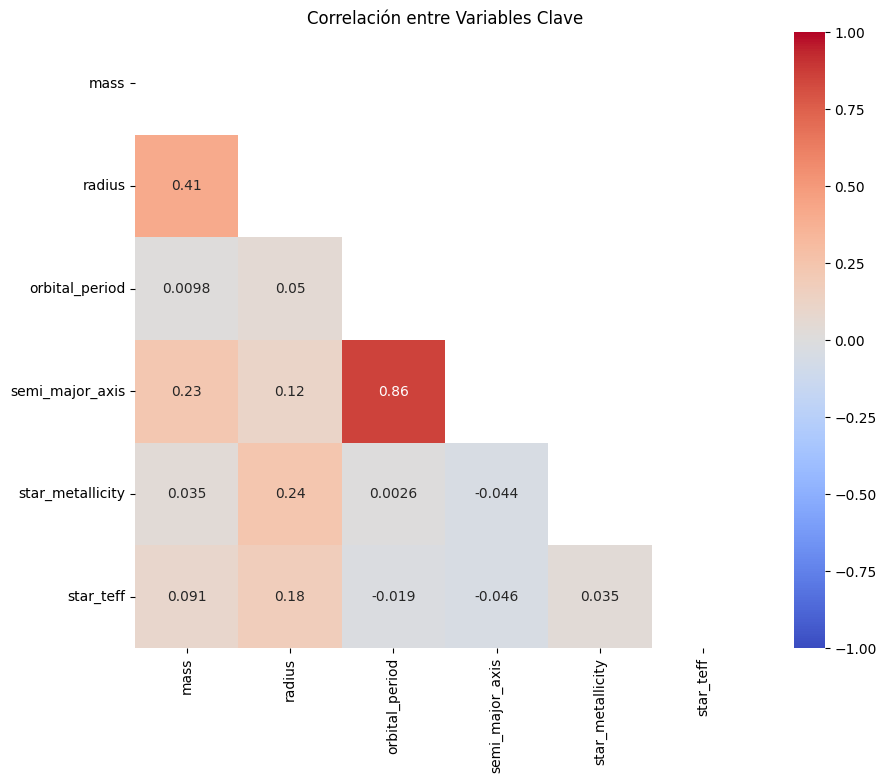

In [24]:
corr_matrix = df_conf[[
    "mass", "radius", "orbital_period", 
    "semi_major_axis", "star_metallicity", "star_teff"
]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))  # Oculta triángulo superior
plt.title("Correlación entre Variables Clave")
plt.show()

In [25]:
df_conf.columns

Index(['name', 'planet_status', 'mass', 'radius', 'orbital_period',
       'semi_major_axis', 'eccentricity', 'star_name', 'star_metallicity',
       'star_mass', 'star_radius', 'star_teff', 'star_sp_type',
       'temp_calculated', 'temp_measured', 'detection_type', 'discovered'],
      dtype='object')

In [26]:
# Muestra el nombre de las columnas
df_conf.columns

Index(['name', 'planet_status', 'mass', 'radius', 'orbital_period',
       'semi_major_axis', 'eccentricity', 'star_name', 'star_metallicity',
       'star_mass', 'star_radius', 'star_teff', 'star_sp_type',
       'temp_calculated', 'temp_measured', 'detection_type', 'discovered'],
      dtype='object')

In [27]:
# Muestra el porcentaje de valores nulos en las columnas
print('Porcentaje de valores nulos en las columnas:')
print(df_conf.isnull().mean() * 100)

Porcentaje de valores nulos en las columnas:
name                 0.000000
planet_status        0.000000
mass                54.953020
radius              33.046980
orbital_period      17.422819
semi_major_axis     30.939597
eccentricity        57.543624
star_name           10.550336
star_metallicity    29.476510
star_mass           16.657718
star_radius         22.523490
star_teff           20.201342
star_sp_type        50.335570
temp_calculated     66.805369
temp_measured       98.281879
detection_type       0.000000
discovered           0.000000
dtype: float64


In [28]:
# Obtenemos un subconjunto del dataset con las columnas que son de nuestro interés
conservar_columnas2 = ['name', 'planet_status', 'mass', 'radius', 'orbital_period', 'semi_major_axis', 'eccentricity', 'star_metallicity', 'detection_type', 'discovered']

df_clean1 = df_conf[conservar_columnas2]

df_clean1

,name,planet_status,mass,radius,orbital_period,semi_major_axis,eccentricity,star_metallicity,detection_type,discovered
0,109 Psc b,Confirmed,5.743,1.152,1075.400000,2.05100,0.104,0.10,"Radial Velocity, Astrometry",2000-01-01
3,112 Psc b,Confirmed,NaN,NaN,4.400000,0.05400,0.376,0.31,Radial Velocity,2022-01-01
4,112 Psc c,Confirmed,9.866,NaN,36336.700000,22.21000,0.174,0.31,"Radial Velocity, Astrometry",2022-01-01
5,11 Com Ab,Confirmed,NaN,NaN,326.030000,1.29000,0.231,-0.35,Radial Velocity,2007-01-01
6,11 UMi b,Confirmed,NaN,NaN,516.220000,1.54000,0.080,0.04,Radial Velocity,2009-01-01
...,...,...,...,...,...,...,...,...,...,...
9974,ZTF J1406+1222 Ab,Confirmed,50.000,0.292,0.054057,0.00272,NaN,NaN,Timing,2022-01-01
9975,ZTF J1622+47 b,Confirmed,61.000,0.980,0.069789,NaN,NaN,NaN,Primary Transit,2022-01-01
9976,ZTF J1637+49 b,Confirmed,23.000,0.680,0.043000,NaN,NaN,NaN,Primary Transit,2021-01-01
9977,ZTF J1828+2308 b,Confirmed,19.500,1.020,0.112007,0.00388,NaN,NaN,Primary Transit,2025-01-01


In [29]:
df_clean_confirmed = df_clean1.dropna()

print(df_clean_confirmed)

           name planet_status      mass  radius  orbital_period  \
0     109 Psc b     Confirmed   5.74300  1.1520     1075.400000   
341   51 Eri Ab     Confirmed   4.10000  1.1100    10260.000000   
342    51 Peg b     Confirmed   0.47000  1.9000        4.230800   
351   55 Cnc Ae     Confirmed   0.02703  0.1737        0.736548   
388    AF Lep b     Confirmed   3.75000  1.3000     8875.000000   
...         ...           ...       ...     ...             ...   
9946    XO-3 Ab     Confirmed  11.79000  1.2170        3.191524   
9947     XO-4 b     Confirmed   1.61600  1.3170        4.124730   
9948     XO-5 b     Confirmed   1.07700  1.0300        4.187754   
9949     XO-6 b     Confirmed   4.47000  2.1700        3.764992   
9950     XO-7 b     Confirmed   0.72600  1.3460        2.864133   

      semi_major_axis  eccentricity  star_metallicity  \
0            2.051000        0.1040             0.100   
341         11.100000        0.4900            -0.027   
342          0.052000   

In [30]:
# Comprobamos el porcentaje de valores nulos de los confirmados
print('Porcentaje de valores nulos:')
print(df_clean_confirmed.isnull().mean() * 100)

Porcentaje de valores nulos:
name                0.0
planet_status       0.0
mass                0.0
radius              0.0
orbital_period      0.0
semi_major_axis     0.0
eccentricity        0.0
star_metallicity    0.0
detection_type      0.0
discovered          0.0
dtype: float64


In [31]:
# Muestra estadísticas generales de las columnas numéricas
print(df_clean_confirmed.describe())

              mass       radius  orbital_period  semi_major_axis  \
count  1023.000000  1023.000000     1023.000000      1023.000000   
mean      2.011035     0.842704      740.385548         0.463124   
min       0.000210     0.026000        0.179715         0.004320   
25%       0.038315     0.270300        3.066571         0.040555   
50%       0.491000     0.969000        4.465630         0.054300   
75%       1.232000     1.230000       10.879171         0.095500   
max      73.400000     2.170000   215000.000000       100.000000   
std       6.915380     0.505142     9873.621888         4.523016   

       eccentricity  star_metallicity                     discovered  
count   1023.000000       1023.000000                           1023  
mean       0.098020          0.061578  2016-09-27 06:21:27.976539648  
min        0.000000         -0.640000            1988-01-01 00:00:00  
25%        0.000000         -0.050000            2013-01-01 00:00:00  
50%        0.036000          0.0

In [32]:
# Muestra los nombres de las columnas del dataset confirmed
print(df_clean_confirmed.columns)

Index(['name', 'planet_status', 'mass', 'radius', 'orbital_period',
       'semi_major_axis', 'eccentricity', 'star_metallicity', 'detection_type',
       'discovered'],
      dtype='object')


In [33]:
# Guardamos el csv limpio de los planetas confirmados
df_clean_confirmed.to_csv("df_clean_confirmed.csv", index=False)

<font color = 'DodgerBlue'>
<font size = 5>

---
    
**Gráficas usando el dataset limpio de los confirmados**

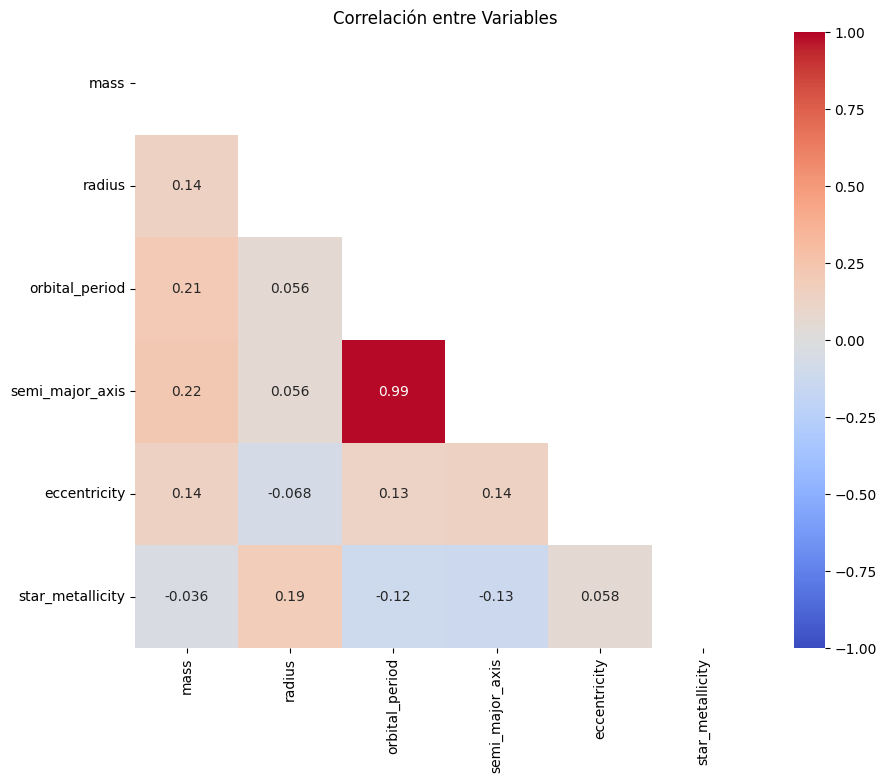

In [39]:
corr_matrix = df_clean_confirmed[[
    "mass", "radius", "orbital_period", 
    "semi_major_axis", "eccentricity",
    "star_metallicity"
]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title("Correlación entre Variables")
plt.show()

C:\Users\matma\AppData\Local\Temp\ipykernel_17972\2805226694.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


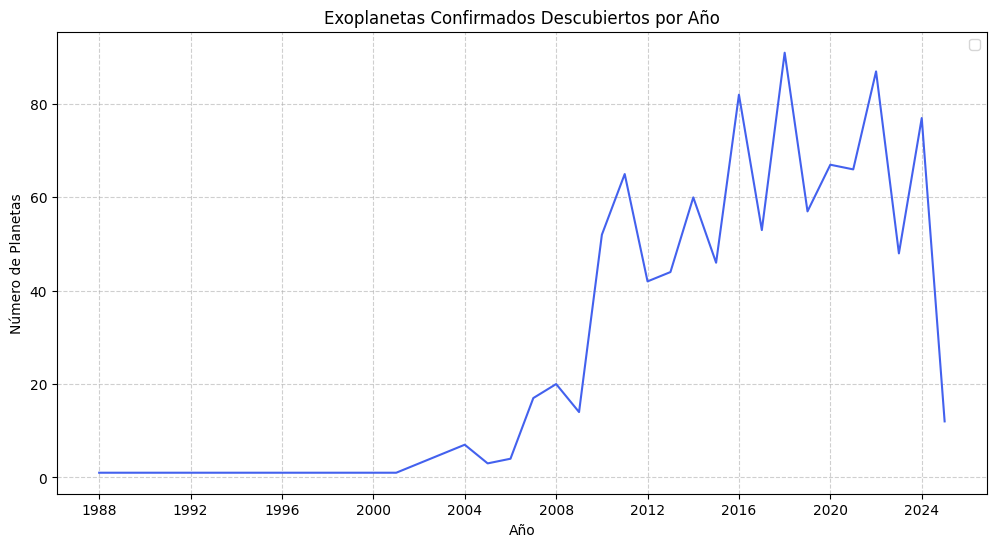

In [35]:
descubiertos_by_year = df_clean_confirmed.groupby('discovered').size()

# Definimos un gráfico de línea para planetas confirmados
plt.figure(figsize=(12, 6))
sns.lineplot(
    x = descubiertos_by_year.index,
    y = descubiertos_by_year.values,
    color = "#4361EE",
)
plt.title("Exoplanetas Confirmados Descubiertos por Año")
plt.xlabel("Año")
plt.ylabel("Número de Planetas")
plt.grid(linestyle="--", alpha=0.6)
plt.legend()
plt.show()

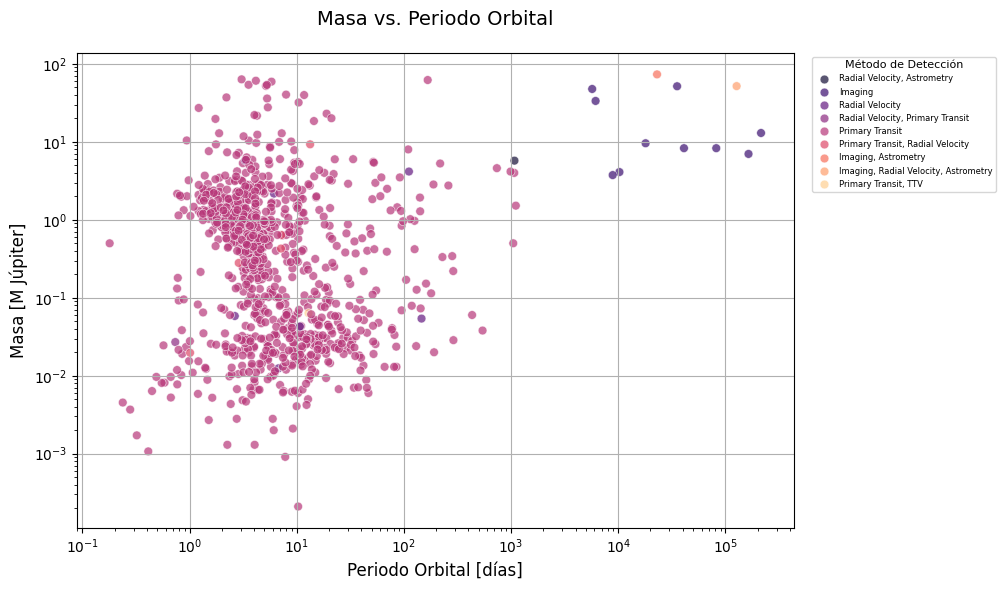

In [43]:
# Tamaño del lienzo
plt.figure(figsize=(12, 6))

# Definimos un gráfico de dispersión para planetas confirmados
scatter = sns.scatterplot(
    data = df_clean_confirmed,
    x = "orbital_period",
    y = "mass",
    hue = "detection_type",
    palette = "magma",
    alpha = 0.7,
    s = 40  # para reducir tamaño de puntos
)

# Escala logarítmica en los ejes
plt.xscale('log')
plt.yscale('log')

# Títulos y labels
plt.title("Masa vs. Periodo Orbital", fontsize = 14, pad = 20)
plt.xlabel("Periodo Orbital [días]", fontsize = 12)
plt.ylabel("Masa [M Júpiter]", fontsize = 12)

# Configurar leyenda
legend = plt.legend(
    title = "Método de Detección",
    title_fontsize = "8",
    fontsize = "6",
    loc = "upper left",
    bbox_to_anchor = (1.02, 1),  # mover 102% a la derecha del eje X
    ncol = 1,  # ajusta las columnas para ahorrar espacio vertical, con 2 se reduce el espacio
    frameon = True  # con fondo
)

# Ajustar márgenes
plt.tight_layout(rect = [0, 0, 0.85, 1])
plt.grid()
plt.show()

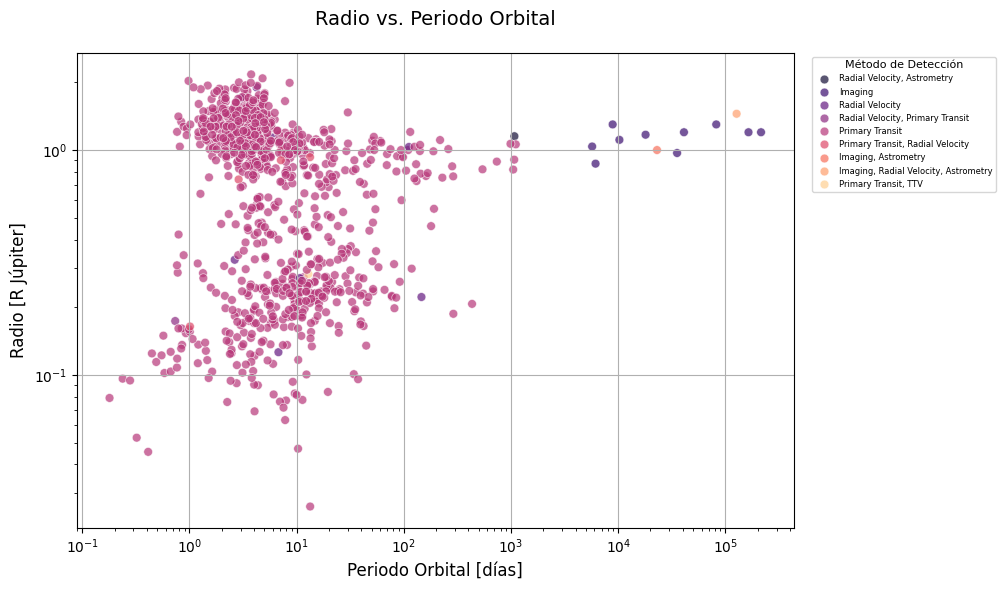

In [46]:
# Tamaño del lienzo
plt.figure(figsize=(12, 6))

# Definimos un gráfico de dispersión para planetas confirmados
scatter = sns.scatterplot(
    data = df_clean_confirmed,
    x = "orbital_period",
    y = "radius",
    hue = "detection_type",
    palette = "magma",
    alpha = 0.7,
    s = 40  # para reducir tamaño de puntos
)

# Escala logarítmica en los ejes
plt.xscale('log')
plt.yscale('log')

# Títulos y labels
plt.title("Radio vs. Periodo Orbital", fontsize = 14, pad = 20)
plt.xlabel("Periodo Orbital [días]", fontsize = 12)
plt.ylabel("Radio [R Júpiter]", fontsize = 12)

# Configurar leyenda
legend = plt.legend(
    title = "Método de Detección",
    title_fontsize = "8",
    fontsize = "6",
    loc = "upper left",
    bbox_to_anchor = (1.02, 1),  # mover 102% a la derecha del eje X
    ncol = 1,  # ajusta las columnas para ahorrar espacio vertical, con 2 se reduce el espacio
    frameon = True  # con fondo
)

# Ajustar márgenes
plt.tight_layout(rect = [0, 0, 0.85, 1])
plt.grid()
plt.show()

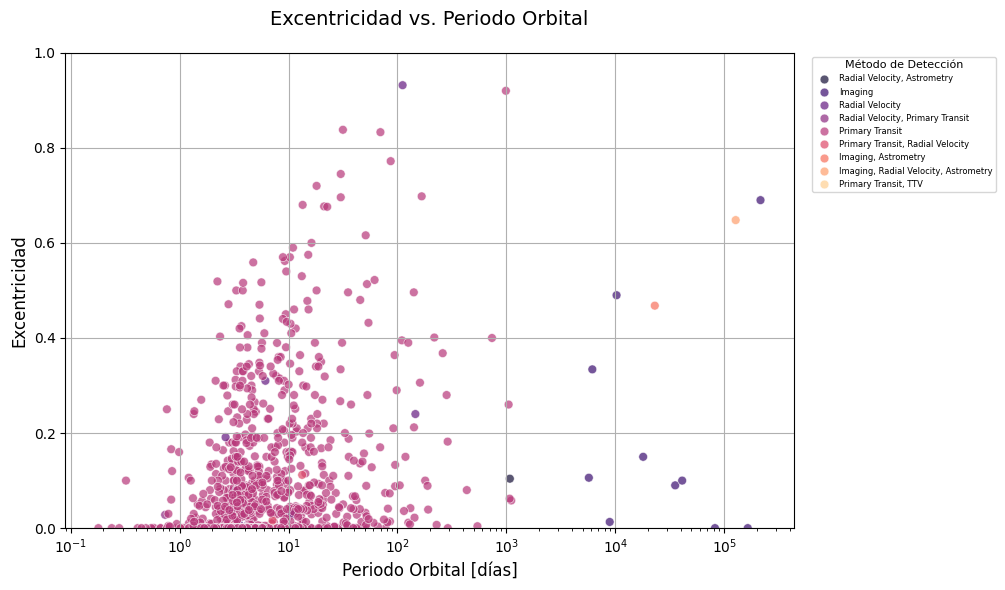

In [38]:
# Tamaño del lienzo
plt.figure(figsize=(12, 6))

# Definimos un gráfico de dispersión para planetas confirmados
scatter = sns.scatterplot(
    data = df_clean_confirmed,
    x = "orbital_period",
    y = "eccentricity",
    hue = "detection_type",
    palette = "magma",
    alpha = 0.7,
    s = 40  # para reducir tamaño de puntos
)

# Escala logarítmica en los ejes
plt.xscale('log')

# Ajustar los limites del eje Y
plt.ylim(0, 1)

# Títulos y labels
plt.title("Excentricidad vs. Periodo Orbital", fontsize = 14, pad = 20)
plt.xlabel("Periodo Orbital [días]", fontsize = 12)
plt.ylabel("Excentricidad", fontsize = 12)

# Configurar leyenda
legend = plt.legend(
    title = "Método de Detección",
    title_fontsize = "8",
    fontsize = "6",
    loc = "upper left",
    bbox_to_anchor = (1.02, 1),  # mover 102% a la derecha del eje X
    ncol = 1,  # ajusta las columnas para ahorrar espacio vertical, con 2 se reduce el espacio
    frameon = True  # con fondo
)

# Ajustar márgenes
plt.tight_layout(rect = [0, 0, 0.85, 1])
plt.grid()
plt.show()

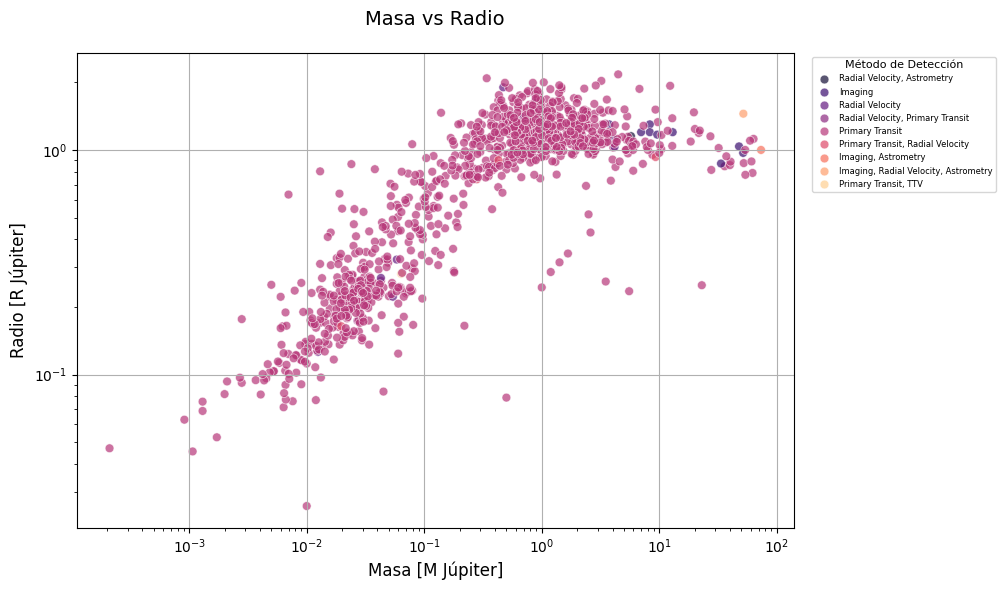

In [49]:
# Tamaño del lienzo
plt.figure(figsize=(12, 6))

# Definimos un gráfico de dispersión para planetas confirmados
scatter = sns.scatterplot(
    data = df_clean_confirmed,
    x = "mass",
    y = "radius",
    hue = "detection_type",
    palette = "magma",
    alpha = 0.7,
    s = 40  # para reducir tamaño de puntos
)

# Escala logarítmica en los ejes
plt.xscale('log')
plt.yscale('log')

# Títulos y labels
plt.title("Masa vs Radio", fontsize = 14, pad = 20)
plt.xlabel("Masa [M Júpiter]", fontsize = 12)
plt.ylabel("Radio [R Júpiter]", fontsize = 12)

# Configurar leyenda
legend = plt.legend(
    title = "Método de Detección",
    title_fontsize = "8",
    fontsize = "6",
    loc = "upper left",
    bbox_to_anchor = (1.02, 1),  # mover 102% a la derecha del eje X
    ncol = 1,  # ajusta las columnas para ahorrar espacio vertical, con 2 se reduce el espacio
    frameon = True  # con fondo
)

# Ajustar márgenes
plt.tight_layout(rect = [0, 0, 0.85, 1])
plt.grid()
plt.show()

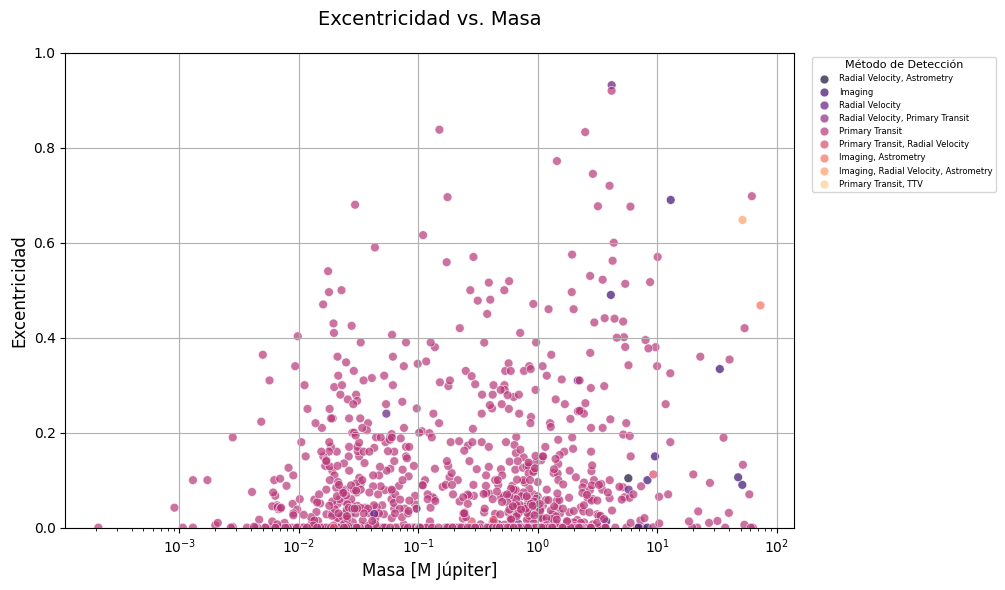

In [58]:
# Tamaño del lienzo
plt.figure(figsize=(12, 6))

# Definimos un gráfico de dispersión para planetas confirmados
scatter = sns.scatterplot(
    data = df_clean_confirmed,
    x = "mass",
    y = "eccentricity",
    hue = "detection_type",
    palette = "magma",
    alpha = 0.7,
    s = 40  # para reducir tamaño de puntos
)

# Escala logarítmica en los ejes
plt.xscale('log')

plt.ylim(0, 1)

# Títulos y labels
plt.title("Excentricidad vs. Masa", fontsize = 14, pad = 20)
plt.xlabel("Masa [M Júpiter]", fontsize = 12)
plt.ylabel("Excentricidad", fontsize = 12)

# Configurar leyenda
legend = plt.legend(
    title = "Método de Detección",
    title_fontsize = "8",
    fontsize = "6",
    loc = "upper left",
    bbox_to_anchor = (1.02, 1),  # mover 102% a la derecha del eje X
    ncol = 1,  # ajusta las columnas para ahorrar espacio vertical, con 2 se reduce el espacio
    frameon = True  # con fondo
)

# Ajustar márgenes
plt.tight_layout(rect = [0, 0, 0.85, 1])
plt.grid()
plt.show()

In [54]:
df_clean_confirmed['planet_status'].shape[0]

1023

In [55]:
df_clean_confirmed["detection_type"].mode()

0    Primary Transit
Name: detection_type, dtype: object